# Week 1 Assignment

In [40]:
# import pandas and matplotlib
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. read file, check data types and null values

In [43]:
df = pd.read_csv("day.csv")
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [44]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [45]:
df.dtypes
# some are categorical or binary but stored as numerical

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [46]:
df.isnull().sum()

# no missing value

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [139]:
df[df["yr"]==0].count()["yr"]
df[df["yr"]==1].count()["yr"]
df.groupby(["yr","mnth"])["mnth"].count()
# no missing daily value

yr  mnth
0   1       31
    2       28
    3       31
    4       30
    5       31
    6       30
    7       31
    8       31
    9       30
    10      31
    11      30
    12      31
1   1       31
    2       29
    3       31
    4       30
    5       31
    6       30
    7       31
    8       31
    9       30
    10      31
    11      30
    12      31
Name: mnth, dtype: int64

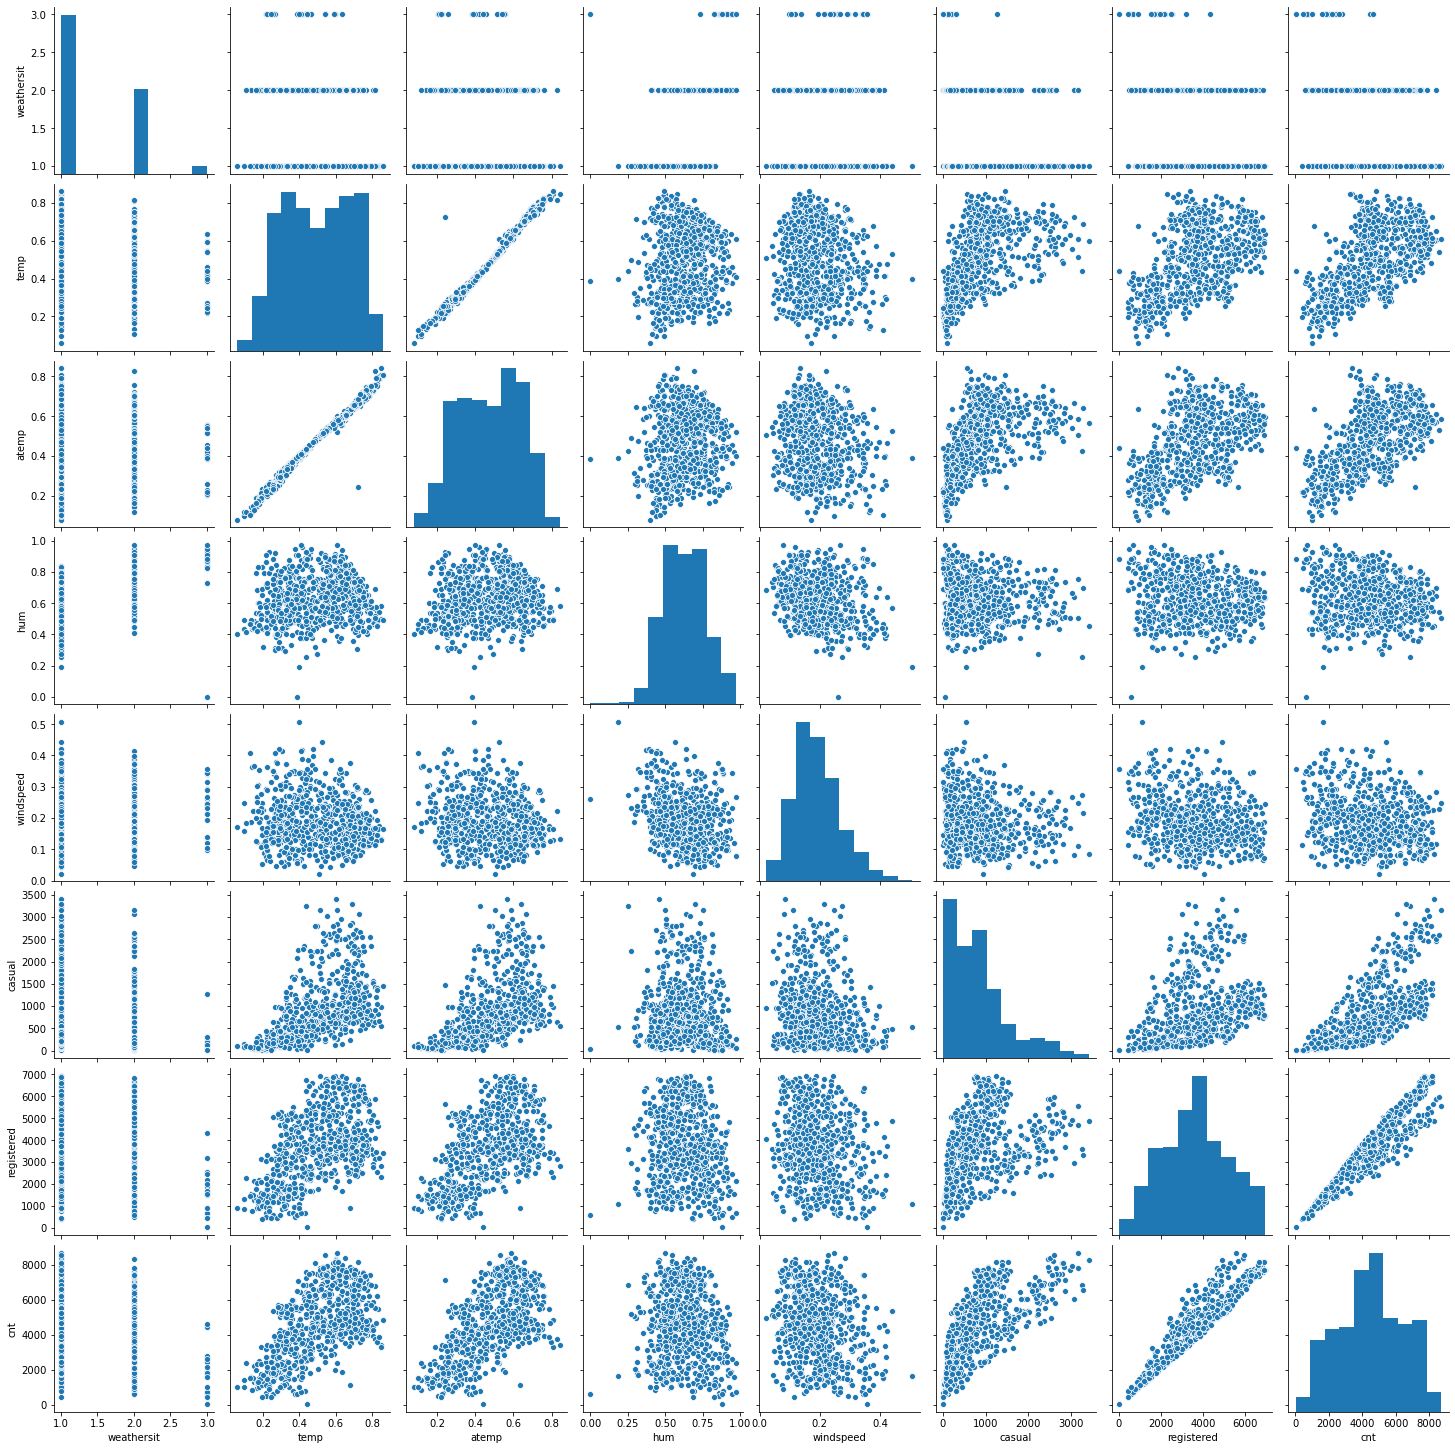

In [134]:
# 2. check outliers
sns.pairplot(data = dfplt, vars=["weathersit", "temp", "atemp", "hum", "windspeed", "casual", "registered", "cnt"])
plt.show()

In [135]:
round(df.groupby("season")[["casual","registered","cnt"]].sum(),0)

,casual,registered,cnt
season,,,
1,60622,410726,471348
2,203522,715067,918589
3,226091,835038,1061129
4,129782,711831,841613


In [136]:
cor=df[["weathersit", "temp", "atemp", "hum", "windspeed", "casual", "registered", "cnt"]].corr()
cor

,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
weathersit,1.000000,-0.120602,-0.121583,0.591045,0.039511,-0.247353,-0.260388,-0.297391
temp,-0.120602,1.000000,0.991702,0.126963,-0.157944,0.543285,0.540012,0.627494
atemp,-0.121583,0.991702,1.000000,0.139988,-0.183643,0.543864,0.544192,0.631066
hum,0.591045,0.126963,0.139988,1.000000,-0.248489,-0.077008,-0.091089,-0.100659
windspeed,0.039511,-0.157944,-0.183643,-0.248489,1.000000,-0.167613,-0.217449,-0.234545
casual,-0.247353,0.543285,0.543864,-0.077008,-0.167613,1.000000,0.395282,0.672804
registered,-0.260388,0.540012,0.544192,-0.091089,-0.217449,0.395282,1.000000,0.945517
cnt,-0.297391,0.627494,0.631066,-0.100659,-0.234545,0.672804,0.945517,1.000000
